# Analysis of Sales of products and customers

In [1]:
# import libraries will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objects as go


In [2]:
def box(x, y, color, xlab, ylab):
    grph = sns.boxplot(x=x, y=y, data=all, color=color)
    grph.set(xlabel=xlab, ylabel=ylab)


In [3]:
def pie(labl, valus, title):
    fig = go.Figure()
    fig = go.Figure([go.Pie( labels = labl, values = valus )])
    fig.update_layout(title_text = title)
    fig.show()

In [4]:
def catplot(x , y, data, xlabl, ylabl):
    ax = sns.catplot(x = x, y = y, data = data)
    ax.set(xlabel=xlabl, ylabel = ylabl)

In [5]:
sns.set_style("whitegrid")



In [6]:
sns.color_palette("Paired")


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [7]:
# import data 
# first file contains clean data of transactions
# second data contains clean data of customers
trans = pd.read_csv('Final Cleaned Data.csv')
cus = pd.read_csv('Only customers.csv')

In [8]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,12/23/2017,0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482
1,3765,38,1,4/6/2017,1,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526
2,5157,47,1,5/11/2017,1,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823
3,9785,72,1,1/5/2017,0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873
4,13424,2,1,2/21/2017,0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573


In [9]:
cus.head()

,customer_id,Name,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine Medendorp,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11
1,2,Eli Bockman,Male,81,42.38,Administrative Officer,Financial Services,Mass Customer,Yes,16
2,3,Arlin Dearle,Male,61,69.30,Recruiting Manager,Property,Mass Customer,Yes,15
3,4,Talbot,Male,33,61.60,NaN,IT,Mass Customer,No,7
4,5,Sheila-kathryn Calton,Female,56,45.98,Senior Editor,NaN,Affluent Customer,Yes,8


In [10]:
# merge two data sets together, to contain customer and his transaction history
all = trans.merge(cus, how = 'inner', on = 'customer_id')

In [11]:
all.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,product_first_sold_date,Name,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,94,86,1,12/23/2017,0,Approved,OHM Cycles,Standard,medium,medium,...,38482,Laraine Medendorp,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11
1,3765,38,1,4/6/2017,1,Approved,Solex,Standard,medium,medium,...,39526,Laraine Medendorp,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11
2,5157,47,1,5/11/2017,1,Approved,Trek Bicycles,Road,low,small,...,37823,Laraine Medendorp,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11
3,9785,72,1,1/5/2017,0,Approved,Norco Bicycles,Standard,medium,medium,...,37873,Laraine Medendorp,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11
4,13424,2,1,2/21/2017,0,Approved,Solex,Standard,medium,medium,...,38573,Laraine Medendorp,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11


# Start by Transations' sales

In [12]:
# save the data into csv file 
all.to_csv('all.csv')

In [13]:
all.shape

(19004, 22)

In [14]:
# check data 
all.isna().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
Name                                      0
gender                                    0
past_3_years_bike_related_purchases       0
Age                                       0
job_title                              2278
job_industry_category                  3135
wealth_segment                            0
owns_car                                  0
tenure                                    0
dtype: int64

null values in job_title and job_industry_category will not cause problems in analysis

In [15]:
all.duplicated().sum()

0

In [16]:
all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Name', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure'],
      dtype='object')

### product_id column

### Max 20 products in sales and number of sales

In [17]:
counts = all.product_id.value_counts(ascending= False).sort_values(ascending = False)[1:20].reset_index()
counts = counts.rename(columns={'index': 'Product_ID', 'product_id': 'Sales_Counts'})
counts


,Product_ID,Sales_Counts
0,3,340
1,1,300
2,38,266
3,35,258
4,2,234
5,4,231
6,5,218
7,80,218
8,90,216
9,12,215


## transaction_date table

In [18]:
all.transaction_date.dtype

dtype('O')

In [19]:
all.transaction_date = pd.to_datetime(all.transaction_date)


In [20]:
all.transaction_date


0       2017-12-23
1       2017-04-06
2       2017-05-11
3       2017-01-05
4       2017-02-21
           ...    
18999   2017-01-09
19000   2017-02-16
19001   2017-08-08
19002   2017-01-11
19003   2017-03-14
Name: transaction_date, Length: 19004, dtype: datetime64[ns]

In [21]:
# add column month
all['month'] = all.transaction_date.dt.month

In [22]:
# Add column year
#all['year'] = all.transaction_date.dt.year>>> 2017

In [23]:
# add column day
all['day'] = all.transaction_date.dt.day

### Months' arrangement in sales

In [24]:
# group by months in number of transactions
all.groupby('month')['transaction_id'].count().sort_values(ascending=False).to_frame(
).reset_index().rename(columns={'index': 'Month', 'transaction_id': 'Transaction_Counts'})



,month,Transaction_Counts
0,10,1693
1,8,1661
2,7,1623
3,5,1616
4,1,1590
5,11,1578
6,4,1569
7,3,1561
8,12,1559
9,2,1553


### Max 10 days in month with max sales

In [25]:
all.groupby('day')['transaction_id'].count()[:10].sort_values(ascending=False).to_frame(
).reset_index().rename(columns={'index': 'Month', 'transaction_id': 'Transaction_Counts'})

,day,Transaction_Counts
0,8,651
1,9,650
2,2,644
3,1,642
4,6,630
5,5,616
6,10,614
7,4,613
8,7,604
9,3,596


In [26]:
all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Name', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'month', 'day'],
      dtype='object')

In [27]:
all.online_order.value_counts()

1    9512
0    9492
Name: online_order, dtype: int64

### Top 5 months in oline orders

In [28]:
all.groupby('month')['online_order'].value_counts()

month  online_order
1      1               809
       0               781
2      1               782
       0               771
3      0               811
       1               750
4      1               798
       0               771
5      1               810
       0               806
6      0               759
       1               740
7      0               839
       1               784
8      1               851
       0               810
9      0               758
       1               744
10     1               873
       0               820
11     1               795
       0               783
12     0               783
       1               776
Name: online_order, dtype: int64

In [29]:
online_order = all[all.online_order == 1]

In [30]:
countonline_order = online_order.groupby('month')['online_order'].count()
countonline_order

month
1     809
2     782
3     750
4     798
5     810
6     740
7     784
8     851
9     744
10    873
11    795
12    776
Name: online_order, dtype: int64

### Top 5 months in offline orders

In [31]:
offline_order = all[all.online_order == 0]

In [32]:
countoffline_order = offline_order.groupby('month')['online_order'].count()
countoffline_order

month
1     781
2     771
3     811
4     771
5     806
6     759
7     839
8     810
9     758
10    820
11    783
12    783
Name: online_order, dtype: int64

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(y = countonline_order.values, x = countonline_order.index, name = 'Online Orders', marker_color = 'pink'))
fig.add_trace(go.Bar( y = countoffline_order.values, x = countonline_order.index,name = 'Offline Orders', marker_color = 'blue'))
fig.update_layout(title = 'Online & Offline Orders')
fig.show()

In [34]:
all.columns


Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Name', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'month', 'day'],
      dtype='object')

### order_status column

In [35]:
all.order_status.head()


0    Approved
1    Approved
2    Approved
3    Approved
4    Approved
Name: order_status, dtype: object

In [36]:
order_status = all.order_status.value_counts()
order_status


Approved     18834
Cancelled      170
Name: order_status, dtype: int64

In [37]:
order_status.index

Index(['Approved', 'Cancelled'], dtype='object')

In [38]:
order_status.values

array([18834,   170], dtype=int64)

In [39]:
fig = go.Figure()
# pink, purple
fig = go.Figure([go.Pie( labels = order_status.index, values = order_status.values )])
fig.update_layout(title = 'Approved & Cancelled orders')

fig.show()

### order state and brand

In [40]:
Approved = len(all[all.order_status == 'Approved'])    
Cancelled = len(all[all.order_status == 'Cancelled'])
print(Approved)
Cancelled


18834


170

In [41]:
total_orger = all.brand.value_counts()

### Top brands on approved Orders

In [42]:
approved_orders = all[all.order_status == 'Approved']
approved_orders.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car,tenure,month,day
0,94,86,1,2017-12-23,0,Approved,OHM Cycles,Standard,medium,medium,...,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11,12,23
1,3765,38,1,2017-04-06,1,Approved,Solex,Standard,medium,medium,...,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11,4,6
2,5157,47,1,2017-05-11,1,Approved,Trek Bicycles,Road,low,small,...,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11,5,11
3,9785,72,1,2017-01-05,0,Approved,Norco Bicycles,Standard,medium,medium,...,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11,1,5
4,13424,2,1,2017-02-21,0,Approved,Solex,Standard,medium,medium,...,Female,93,69.58,Executive Secretary,Health,Mass Customer,Yes,11,2,21


In [43]:
approved_orders_df = approved_orders.brand.value_counts().to_frame()
approved_orders_df


,brand
Solex,4051
Giant Bicycles,3148
WeareA2B,3128
OHM Cycles,2904
Trek Bicycles,2839
Norco Bicycles,2764


### Top brands with canceled orders

In [44]:
cancelled_orders = all[all.order_status == 'Cancelled']
cancelled_orders.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car,tenure,month,day
120,17002,64,22,2017-01-06,1,Cancelled,Trek Bicycles,Standard,medium,large,...,Female,79,60.41,NaN,IT,Mass Customer,No,11,1,6
188,7024,18,33,2017-07-29,1,Cancelled,Solex,Standard,medium,medium,...,Male,44,65.87,Product Engineer,NaN,Affluent Customer,Yes,11,7,29
228,3342,67,41,2017-08-03,0,Cancelled,Norco Bicycles,Road,medium,medium,...,Male,64,47.06,Food Chemist,Health,Mass Customer,No,16,8,3
378,11926,36,66,2017-06-26,0,Cancelled,Solex,Standard,low,medium,...,Male,46,21.13,Account Executive,Argiculture,High Net Worth,No,1,6,26
631,3197,96,113,2017-01-04,0,Cancelled,WeareA2B,Road,low,small,...,Male,67,67.01,Staff Scientist,NaN,Mass Customer,No,20,1,4


In [45]:
cancelled_orders_df = cancelled_orders.brand.value_counts()
cancelled_orders_df


Solex             41
WeareA2B          30
Giant Bicycles    26
OHM Cycles        26
Trek Bicycles     25
Norco Bicycles    22
Name: brand, dtype: int64

In [46]:
orders_counts = all.groupby(['brand', 'order_status']).size().reset_index(name='counts')
orders_counts

,brand,order_status,counts
0,Giant Bicycles,Approved,3148
1,Giant Bicycles,Cancelled,26
2,Norco Bicycles,Approved,2764
3,Norco Bicycles,Cancelled,22
4,OHM Cycles,Approved,2904
5,OHM Cycles,Cancelled,26
6,Solex,Approved,4051
7,Solex,Cancelled,41
8,Trek Bicycles,Approved,2839
9,Trek Bicycles,Cancelled,25


In [47]:
orders_counts = orders_counts.pivot(index='brand', columns='order_status', values='counts').reset_index()
orders_counts

order_status,brand,Approved,Cancelled
0,Giant Bicycles,3148,26
1,Norco Bicycles,2764,22
2,OHM Cycles,2904,26
3,Solex,4051,41
4,Trek Bicycles,2839,25
5,WeareA2B,3128,30


In [48]:
orders_counts = orders_counts.rename(columns={'brand': 'Brand', 
                                              'approved': 'Approved', 
                                              'cancelled': 'Cancelled'})
orders_counts

order_status,Brand,Approved,Cancelled
0,Giant Bicycles,3148,26
1,Norco Bicycles,2764,22
2,OHM Cycles,2904,26
3,Solex,4051,41
4,Trek Bicycles,2839,25
5,WeareA2B,3128,30


In [49]:
fig = go.Figure()
fig.add_trace(go.Bar(y = orders_counts.Approved, x = orders_counts.Brand,
              name='Online Orders', marker_color='orange'))
fig.add_trace(go.Bar(y= orders_counts.Cancelled, x = orders_counts.Brand,
              name='Offline Orders', marker_color='blue'))
fig.update_layout(title='OApproved and Cancelled Orders for each brand')
fig.show()


In [50]:
product_line = all.product_line.value_counts()
product_line


Standard    13620
Road         3802
Touring      1172
Mountain      410
Name: product_line, dtype: int64

In [51]:
fig = go.Figure()
fig = go.Figure([go.Pie( labels = product_line.index, values = product_line.values )])
fig.update_layout(title_text = 'Product Line')
fig.show()

In [52]:
product_class = all.product_class.value_counts()
product_class

medium    13261
high       2889
low        2854
Name: product_class, dtype: int64

In [53]:
fig = go.Figure()
fig = go.Figure([go.Pie( labels = product_class.index, values = product_class.values )])
fig.update_layout(title_text = 'Product Classes')
fig.show()

In [54]:
product_size = all.product_size.value_counts()

In [55]:
fig = go.Figure()
fig = go.Figure([go.Pie( labels = product_size.index, values = product_size.values )])
fig.update_layout(title_text = 'Product Size')
fig.show()

list_price


In [56]:
all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Name', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'month', 'day'],
      dtype='object')

### Most expinsive brand

In [57]:
all.list_price.head()

0     235.63
1    1577.53
2    1720.70
3     360.40
4      71.49
Name: list_price, dtype: float64

In [58]:
all.list_price.max()


2091.47

In [59]:
all[all.list_price == all.list_price.max()].brand.value_counts()


Trek Bicycles    451
Name: brand, dtype: int64

### Most cheapest brand

In [60]:
all[all.list_price == all.list_price.min()].product_id.value_counts()


19    142
0      50
Name: product_id, dtype: int64

### Most expensive product

In [61]:
all[all.list_price == all.list_price.max()].product_id.value_counts()

3     340
38    111
Name: product_id, dtype: int64

### Most cheapest product

In [62]:
all[all.list_price == all.list_price.min()].list_price


158      12.01
246      12.01
328      12.01
446      12.01
500      12.01
         ...  
18222    12.01
18454    12.01
18629    12.01
18636    12.01
18761    12.01
Name: list_price, Length: 192, dtype: float64

### Top 10 expensive products

In [63]:
all.pivot_table(index = 'product_id' ,  values = ['list_price']).sort_values(by = 'list_price' ,ascending=False).head(10)

,list_price
product_id,
3,2091.47
83,2083.94
51,2005.66
26,1992.93
60,1977.36
73,1945.43
55,1894.19
57,1890.39
75,1873.97


In [64]:
all.pivot_table(index = 'brand' ,  values = ['list_price']).sort_values(by = 'list_price' ,ascending=False)

,list_price
brand,
WeareA2B,1261.765418
Giant Bicycles,1232.975577
Trek Bicycles,1187.372580
Solex,1051.888346
OHM Cycles,979.540375
Norco Bicycles,912.095316


### Brands according to sales

In [65]:
BrandsSales = all.pivot_table(index = 'brand' ,  values = ['list_price'], aggfunc= np.sum).sort_values(by = 'list_price' )
BrandsSales

,list_price
brand,
Norco Bicycles,2541097.55
OHM Cycles,2870053.30
Trek Bicycles,3400635.07
Giant Bicycles,3913464.48
WeareA2B,3984655.19
Solex,4304327.11


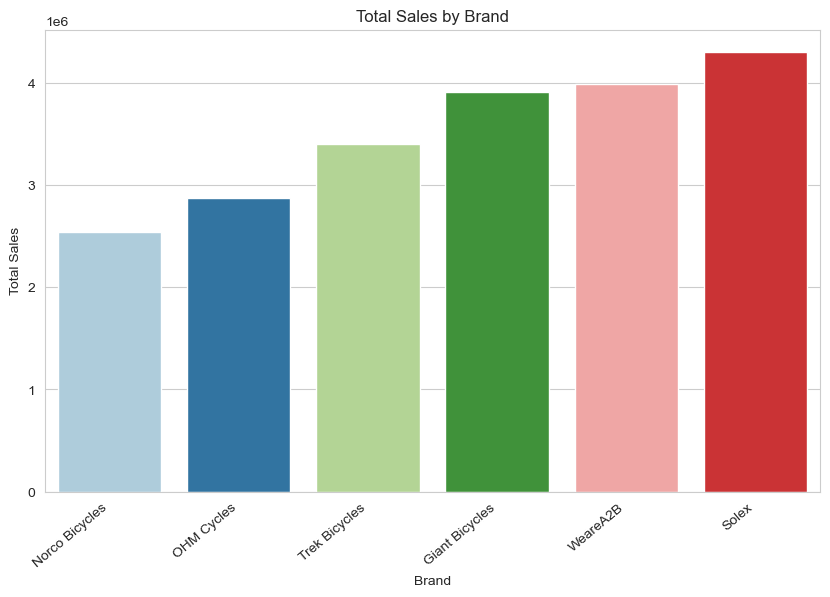

In [66]:
sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data = BrandsSales, x = BrandsSales.index, y = 'list_price', palette = "Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Brand")
ax.set_ylabel("Total Sales")
ax.set_title("Total Sales by Brand")
plt.show()

### Top 10 products in price

In [67]:
all.groupby('product_id')['list_price'].mean().round(1).sort_values(ascending= False)[:10]


product_id
3     2091.5
83    2083.9
51    2005.7
26    1992.9
60    1977.4
73    1945.4
55    1894.2
57    1890.4
75    1874.0
71    1842.9
Name: list_price, dtype: float64

### Jops of people with heighest sales

In [68]:
# BrandsSales = all.pivot_table(index = 'brand' ,  values = ['list_price'], aggfunc= np.sum).sort_values(by = 'list_price' )
hopsWithSales = all.pivot_table(index = 'job_industry_category', values = 'list_price', aggfunc = np.sum).sort_values(by = 'list_price')
hopsWithSales


,list_price
job_industry_category,
Telecommunications,371181.11
Argiculture,599831.35
IT,751317.60
Entertainment,769763.05
Property,1391595.60
Retail,1933601.82
Health,3296248.62
Financial Services,4163057.33
Manufacturing,4293695.13


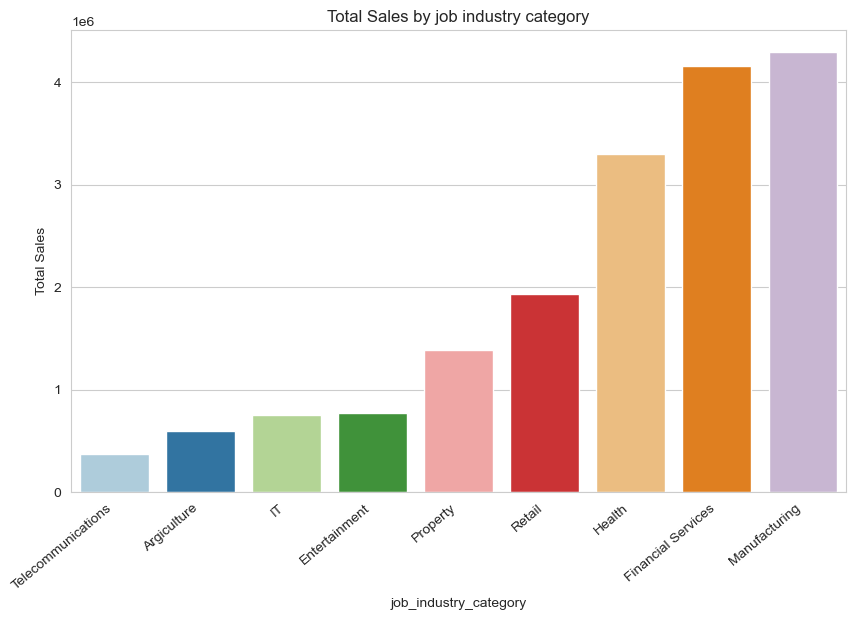

In [69]:

plt.figure(figsize=(10, 6))
axx = sns.barplot(
    data = hopsWithSales,
                 x = hopsWithSales.index,
                 y='list_price',
                 palette="Paired")
axx.set_xticklabels(axx.get_xticklabels(), rotation=40, ha="right")
axx.set_xlabel("job_industry_category")
axx.set_ylabel("Total Sales")
axx.set_title("Total Sales by job industry category")
plt.show()


### gender

In [70]:
all.gender.value_counts()

Female    9749
Male      9255
Name: gender, dtype: int64

### Brands bought by Gender

In [71]:
Brands = all.groupby(['brand', 'gender']).size().reset_index(name = 'counts')
Brands


,brand,gender,counts
0,Giant Bicycles,Female,1615
1,Giant Bicycles,Male,1559
2,Norco Bicycles,Female,1406
3,Norco Bicycles,Male,1380
4,OHM Cycles,Female,1502
5,OHM Cycles,Male,1428
6,Solex,Female,2107
7,Solex,Male,1985
8,Trek Bicycles,Female,1493
9,Trek Bicycles,Male,1371


In [72]:
BrandsPivot = Brands.pivot_table( index = 'brand', 
                                    columns = 'gender', values = 'counts',  fill_value=0).reset_index()
BrandsPivot


gender,brand,Female,Male
0,Giant Bicycles,1615,1559
1,Norco Bicycles,1406,1380
2,OHM Cycles,1502,1428
3,Solex,2107,1985
4,Trek Bicycles,1493,1371
5,WeareA2B,1626,1532


In [73]:
fig = go.Figure()
fig.add_trace(go.Bar(x = BrandsPivot.brand, y = BrandsPivot.Female,
                     name='Females', marker_color='orange'))

fig.add_trace(go.Bar(x = BrandsPivot.brand, y = BrandsPivot.Male, 
                     name='Males', marker_color='blue'))

fig.update_layout(title='Male and Females for each brand',
                  yaxis = dict(title = 'Brands'))
fig.show()


### Max 10 jobs categories in customers

In [74]:
max10jobs = all.job_title.value_counts().sort_values(ascending=False)[:10]
max10jobs


Social Worker                           215
Business Systems Development Analyst    202
Internal Auditor                        201
Legal Assistant                         198
Nuclear Power Engineer                  197
Assistant Professor                     196
Chemical Engineer                       191
Tax Accountant                          190
Associate Professor                     190
Executive Secretary                     189
Name: job_title, dtype: int64

# Customer

In [75]:
all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Name', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'month', 'day'],
      dtype='object')

In [76]:
all.Age


0        69.58
1        69.58
2        69.58
3        69.58
4        69.58
         ...  
18999    55.80
19000    55.80
19001    55.80
19002    55.80
19003    55.80
Name: Age, Length: 19004, dtype: float64

In [77]:
def age_stage(age):
    if age < 18:
        return 'adolescent'
    elif age < 65:
        return 'adult'
    else:
        return 'older'


## Age State

In [78]:
all['Age_State'] = all.Age.apply(age_stage)

In [79]:
age_state = all['Age_State'].value_counts()
age_state


adult    17610
older     1394
Name: Age_State, dtype: int64

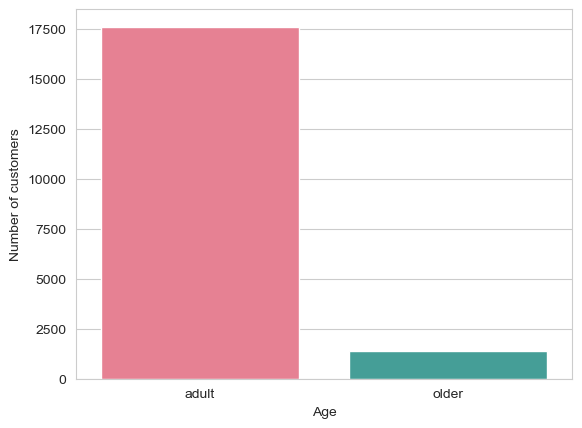

In [80]:
ax = sns.barplot(x = age_state.index, y = age_state.values, palette="husl")
ax.set(xlabel = "Age", ylabel = "Number of customers")
plt.show()

### Bike purchase in 3 years vs. Industry Class

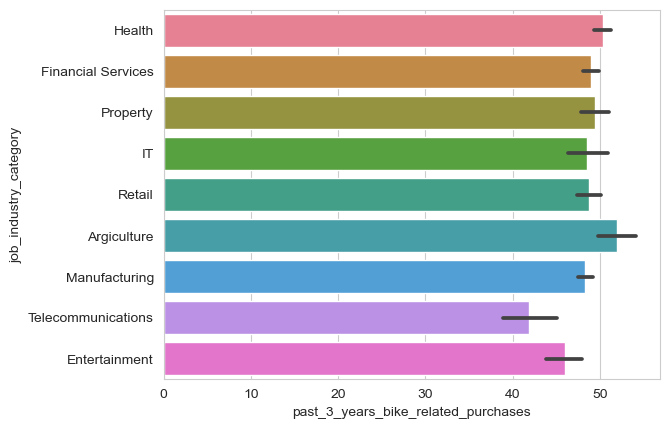

In [81]:
ax = sns.barplot(y ='job_industry_category',
                 x ='past_3_years_bike_related_purchases', data=all, palette="husl")


**Observation**
#### According to the previous chart:
* Customers who in `Agriculture` industry score have invested more on bikes in past 3 years.
* Customers who in `Telecommunications` industry score have invested lowest on bikes in past 3 years.
*  The `Telecommunications` purchase data is the least reliabe. The distribution is not tight.

In [82]:
all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Name', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'month', 'day', 'Age_State'],
      dtype='object')

In [83]:
waelthsegm = all.wealth_segment.value_counts()
waelthsegm


Mass Customer        9528
High Net Worth       4849
Affluent Customer    4627
Name: wealth_segment, dtype: int64

In [84]:
pie(waelthsegm.index, waelthsegm.values, 'Wealth Segment')

### Bike purchase in 3 years Vs. Wealth Segments

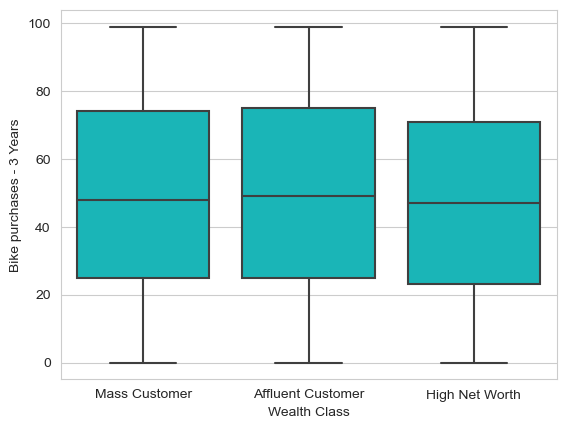

In [85]:
box("wealth_segment", "past_3_years_bike_related_purchases",
    "darkturquoise",
    "Wealth Class", "Bike purchases - 3 Years")


**Observation**
* All of these data are Normal Distribution
*  Mean of the distribution is almost to 50.
*  50% of data between 28 to 75 purchases
*  Distribution of purchases is almost in range 100 of 3 years purchases. 

### Bike purchase in 3 years Vs. Age

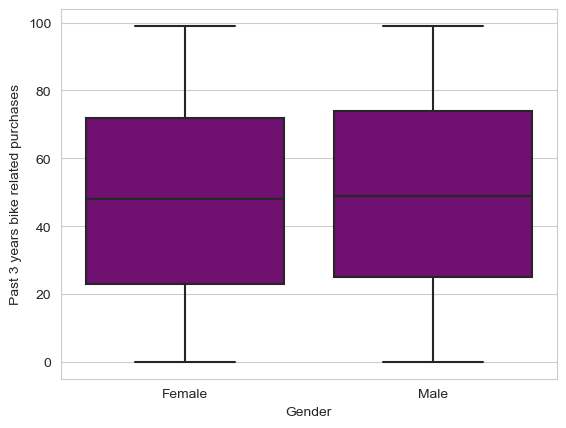

In [86]:
box('gender', 'past_3_years_bike_related_purchases', 'Purple', 'Gender','Past 3 years bike related purchases')

**Observations**: 
* From the plot it is visible that the `Female` category has a greater range than that of the `Male`
* The distribution of the `Female` is completely `Normal` whereas the `Male` is not symmetric
* `50%`of the data for the `Female` class lie between `≈27 - ≈75` purchases 

In [87]:
all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Name', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'month', 'day', 'Age_State'],
      dtype='object')

### Bike purchase in 3 years Vs. own cars

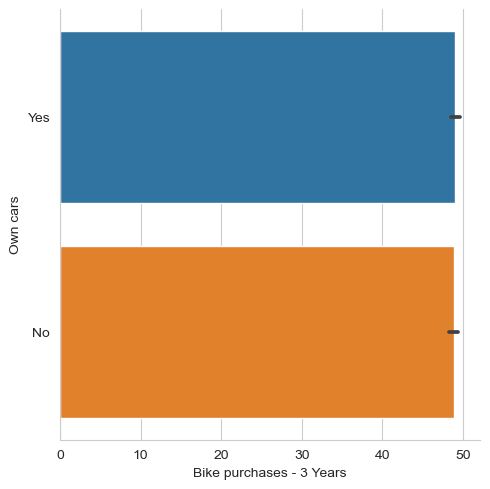

In [88]:
ax = sns.catplot(y = "owns_car", x = "past_3_years_bike_related_purchases", kind="bar", data= all)
ax.set(xlabel="Bike purchases - 3 Years", ylabel = "Own cars")


**Observations**

* The customers with `No cars` tend to have slightly bigger `Mean` of bikes in 3 years

### Bike purchase in 3 years Vs. Product Size

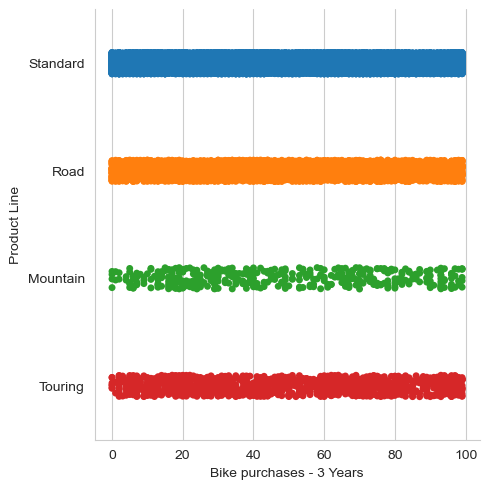

In [89]:
catplot('past_3_years_bike_related_purchases', 'product_line',
        all, 'Bike purchases - 3 Years',  'Product Line')


**Observations**

* The `Standard` bikes were the favourite followed by the `Road` line
* The customers were not that fond of `Mountain` in the given 3 years
* The distribution for `Touring` bikes are sparse due to less data-points